<a href="https://colab.research.google.com/github/hemanthkumar17/Graph_Machine_Learning/blob/main/ML_With_Graphs_2___AUC_for_preferential_attachment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML with Graph - Assignment 2
#### By Hemanth Kumar Jayakumar

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G.add_edges_from(
    [[1, 2],
    [1, 3],
    [1, 4],
    [5, 6],
    [5, 7],
    [5, 8],
    [9, 10],
    [9, 11],
    [9, 12]]
)

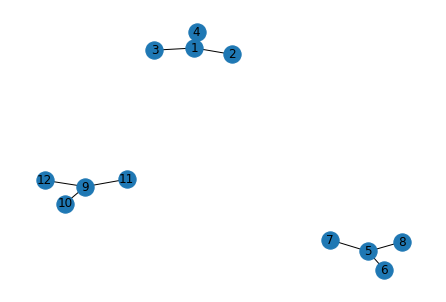

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
pref= nx.preferential_attachment(G)
pred = {}
for u, v, score in pref:
    pred[(u, v)] = score

For Graph a where ground truth only has 1 edge prediction

In [ ]:
true = {}
for u in G.nodes:
    for v in G.nodes:
        if u != v:
            true[(u, v)] = 0
true[(1, 9)] = 1
y_pred = []
y_true = []
for key in pred:
    y_true.append(true[key])
    y_pred.append(pred[key])
# y_pred = [y / sum(y_pred) for y in y_pred]
# y_true = [y / sum(y_true) for y in y_true]

In [ ]:
from sklearn import metrics

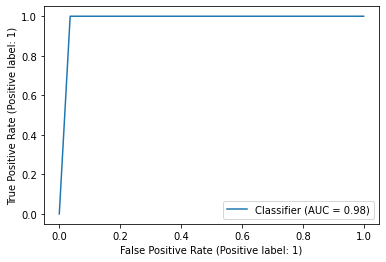

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
auc1 = metrics.auc(fpr, tpr)

For Graph b where 2 edges are being predicted at once

In [ ]:
true = {}
for u in G.nodes:
    for v in G.nodes:
        if u != v:
            true[(u, v)] = 0
true[(1, 9)] = 1
true[(1, 5)] = 1
y_pred = []
y_true = []
for key in pred:
    y_true.append(true[key])
    y_pred.append(pred[key])
# y_pred = [y / sum(y_pred) for y in y_pred]
# y_true = [y / sum(y_true) for y in y_true]

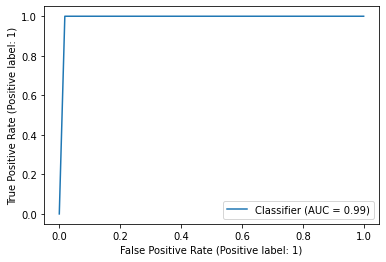

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
auc2 = metrics.auc(fpr, tpr)

In [ ]:
auc1

0.9821428571428571

In [ ]:
auc2

0.990909090909091

There is an increase in auc values implying that AUC is a good evaluation metric for comparing classifiers varying by number of edges per classification.